In [97]:
#preprocessing data
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime

In [98]:
dataset = pd.read_csv('incident_event_log.csv')

In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [100]:
#eliminer tous les attributs qu'on pas d'interet pour notre analyse
columns_to_drop = {'reassignment_count', 'reopen_count', 'sys_mod_count','sys_created_at', 'sys_updated_at','contact_type','cmdb_ci','impact','urgency','notify','problem_id','rfc','vendor','caused_by','closed_code','resolved_by','resolved_at'}
datasetV1 = dataset.drop(columns= columns_to_drop)
#data to calculate THE time resolution we need two attribute 'opened_at' 'closed_at'


In [101]:
datasetV1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   made_sla                 141712 non-null  bool  
 4   caller_id                141712 non-null  object
 5   opened_by                141712 non-null  object
 6   opened_at                141712 non-null  object
 7   sys_created_by           141712 non-null  object
 8   sys_updated_by           141712 non-null  object
 9   location                 141712 non-null  object
 10  category                 141712 non-null  object
 11  subcategory              141712 non-null  object
 12  u_symptom                141712 non-null  object
 13  priority                 141712 non-null  object
 14  assignment_group    

In [102]:
#Taking care of missing data
#remplacer le signe'?' par des nan 'not a number'
datasetV1 = datasetV1.replace('?',np.nan)
datasetV2=datasetV1.dropna( axis=0,how='any')

In [103]:
#eliminer tous les attributs qu'on pas d'interet pour notre analyse
columns_to_drop1 = {'active','caller_id','made_sla','sys_created_by','sys_updated_by','location','subcategory','u_symptom','assignment_group','assigned_to','knowledge','u_priority_confirmation'}
datasetV3 = datasetV2.drop(columns= columns_to_drop1)

In [104]:
datasetV3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53762 entries, 4 to 141426
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   number          53762 non-null  object
 1   incident_state  53762 non-null  object
 2   opened_by       53762 non-null  object
 3   opened_at       53762 non-null  object
 4   category        53762 non-null  object
 5   priority        53762 non-null  object
 6   closed_at       53762 non-null  object
dtypes: object(7)
memory usage: 3.3+ MB


In [105]:
datasetV3.head(7)
#number selct the last one or 2 or 3
#code 

,number,incident_state,opened_by,opened_at,category,priority,closed_at
4,INC0000047,New,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,06/03/2016 10:00
5,INC0000047,Active,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,06/03/2016 10:00
6,INC0000047,Active,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,06/03/2016 10:00
7,INC0000047,Active,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,06/03/2016 10:00
8,INC0000047,Active,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,06/03/2016 10:00
9,INC0000047,Active,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,06/03/2016 10:00
10,INC0000047,Awaiting User Info,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,06/03/2016 10:00


In [106]:
#TAKE JUST CLOSED INCIDENT 
datasetV3= datasetV3.loc[datasetV3['incident_state'] == 'Closed'].reset_index().drop(columns={'index'})

In [107]:
priority_mapping = {'1 - Critical':1,'2 - High':2,'3 - Moderate':3,'4 - Low':4}
datasetV3["priority"].replace(priority_mapping,inplace= True)
datasetV3["priority"] = datasetV3["priority"].astype(int)

In [108]:
datasetV4 = datasetV3.drop(columns='incident_state')

In [109]:
datasetV4.head(3)

,number,opened_by,opened_at,category,priority,closed_at
0,INC0000047,Opened by 397,29/02/2016 04:40,Category 40,3,06/03/2016 10:00
1,INC0000060,Opened by 180,29/02/2016 06:38,Category 9,3,07/03/2016 13:00
2,INC0000064,Opened by 131,29/02/2016 07:10,Category 53,3,08/03/2016 17:00


In [110]:
categorical = [col for col in datasetV4.columns if datasetV4[col].dtype==object]
numerical = [col for col in datasetV4.columns if datasetV4[col].dtype!=object]

In [111]:
print(categorical)

['number', 'opened_by', 'opened_at', 'category', 'closed_at']


In [112]:
print(numerical)

['priority']


In [113]:
print(datasetV4.shape)
print(datasetV4.describe(include='all'))

(8213, 6)
            number      opened_by         opened_at     category     priority  \
count         8213           8213              8213         8213  8213.000000   
unique        8195            167              7530           50          NaN   
top     INC0011169  Opened by  17  05/04/2016 15:52  Category 46          NaN   
freq             4           2454                 5         1416          NaN   
mean           NaN            NaN               NaN          NaN     2.983928   
std            NaN            NaN               NaN          NaN     0.327331   
min            NaN            NaN               NaN          NaN     1.000000   
25%            NaN            NaN               NaN          NaN     3.000000   
50%            NaN            NaN               NaN          NaN     3.000000   
75%            NaN            NaN               NaN          NaN     3.000000   
max            NaN            NaN               NaN          NaN     4.000000   

               cl

In [114]:
#weeb site ::: https://www.programiz.com/python-programming/datetime/strptime
#we convert the format of date closing and opening incident using datetime object
datasetV4['closed_at'] = datasetV4['closed_at'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M'))
datasetV4['opened_at'] = datasetV4['opened_at'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M'))

In [115]:
datasetV4.head(2)

,number,opened_by,opened_at,category,priority,closed_at
0,INC0000047,Opened by 397,2016-02-29 04:40:00,Category 40,3,2016-03-06 10:00:00
1,INC0000060,Opened by 180,2016-02-29 06:38:00,Category 9,3,2016-03-07 13:00:00


In [116]:
#we calculate the time taken by each incident 
#calculates the difference between two dates
datasetV4['Time (min)']=datasetV4['closed_at']-datasetV4['opened_at']
#converts the difference in terms of days
datasetV4['Time (min)']=datasetV4['Time (min)']/np.timedelta64(1,'D')
#time in minutes
datasetV4['Time (min)']=datasetV4['Time (min)']*24*60
datasetV4.head(1)

,number,opened_by,opened_at,category,priority,closed_at,Time (min)
0,INC0000047,Opened by 397,2016-02-29 04:40:00,Category 40,3,2016-03-06 10:00:00,8960.0


In [117]:
datasetV4 = datasetV4.drop(columns={'closed_at','opened_at'})

In [118]:
datasetV4.head(1)

,number,opened_by,category,priority,Time (min)
0,INC0000047,Opened by 397,Category 40,3,8960.0


In [119]:
nan_index = datasetV4[datasetV4['category'].isnull()].index
print(nan_index)

Int64Index([], dtype='int64')


In [120]:
nan_index = datasetV4[datasetV4['priority'].isnull()].index
print(nan_index)

Int64Index([], dtype='int64')


In [121]:
datasetV4['category'].unique()

array(['Category 40', 'Category 9', 'Category 53', 'Category 45',
       'Category 24', 'Category 55', 'Category 37', 'Category 44',
       'Category 23', 'Category 61', 'Category 62', 'Category 20',
       'Category 42', 'Category 13', 'Category 8', 'Category 19',
       'Category 46', 'Category 51', 'Category 34', 'Category 26',
       'Category 32', 'Category 35', 'Category 22', 'Category 56',
       'Category 38', 'Category 7', 'Category 30', 'Category 43',
       'Category 63', 'Category 57', 'Category 47', 'Category 28',
       'Category 25', 'Category 17', 'Category 4', 'Category 54',
       'Category 33', 'Category 2', 'Category 16', 'Category 21',
       'Category 59', 'Category 12', 'Category 31', 'Category 52',
       'Category 6', 'Category 10', 'Category 29', 'Category 50',
       'Category 48', 'Category 14'], dtype=object)

In [122]:

#web site ::: https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'category'.
datasetV4['category']= label_encoder.fit_transform(datasetV4['category'])
datasetV4['opened_by']= label_encoder.fit_transform(datasetV4['opened_by'])
datasetV4['number']= label_encoder.fit_transform(datasetV4['number'])


datasetV4['category'].unique()


array([26, 49, 37, 30, 12, 39, 23, 29, 11, 44, 45,  8, 27,  2, 48,  6, 31,
       35, 21, 14, 19, 22, 10, 40, 24, 47, 17, 28, 46, 41, 32, 15, 13,  5,
       25, 38, 20,  7,  4,  9, 42,  1, 18, 36, 43,  0, 16, 34, 33,  3])

In [123]:
datasetV4['opened_by'].unique()

array([ 99,  30,  12, 101, 153, 109, 135, 100, 149,  48,  11,  67,  49,
        42,  77,  91,  94,  34,  68,  47, 115, 139, 146, 163,  44,   8,
        26, 137,  45, 140,  52, 128,  38, 108, 114,  56, 138, 136, 126,
        15,  33,  98,  97, 143, 144, 159, 121,  21,  85, 102,   7,  29,
        20, 162, 112,  35,  69, 151,   3,  86,  27, 156,  70, 150,  93,
        53,  32,  89, 120, 123, 105, 165,  65, 134,  96,  28, 116,  87,
       158,  63,  92,  25,  50, 104,  64, 122, 166, 155,  74, 152, 119,
        73,  81,  62,  84,   0,   5, 161,   4,  82, 127,  76, 142,  46,
       124, 145,  54,  19, 132,  31, 157, 129,  83,  10,  75,  55, 164,
        40, 107,   1,  37,  39,  79,  88, 125, 133,  61,  58,  59,  41,
        72,  16,  17,   6,  80,   9,   2,  36, 113, 131,  22, 130,  66,
        14,  24,  43, 111, 117, 160,  13, 141,  18,  23, 148,  57,  90,
        51, 118,  60, 110, 103, 154, 147,  71, 106,  78,  95])

In [124]:
datasetV4['number'].unique()

array([   0,    1,    2, ..., 8192, 8193, 8194])

In [125]:
datasetV4 = datasetV4.drop(columns={'number'})

In [126]:
datasetV4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8213 entries, 0 to 8212
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   opened_by   8213 non-null   int32  
 1   category    8213 non-null   int32  
 2   priority    8213 non-null   int32  
 3   Time (min)  8213 non-null   float64
dtypes: float64(1), int32(3)
memory usage: 160.5 KB


In [127]:
datasetV4.head(4)

,opened_by,category,priority,Time (min)
0,99,26,3,8960.0
1,30,49,3,10462.0
2,12,37,3,12110.0
3,12,30,3,10582.0


In [129]:
dataset_temp = datasetV4.loc[:, datasetV4.columns != 'Time (min)'] 

In [130]:
corr = dataset_temp.corr()
corr

,opened_by,category,priority
opened_by,1.000000,-0.020150,-0.075574
category,-0.020150,1.000000,-0.008521
priority,-0.075574,-0.008521,1.000000


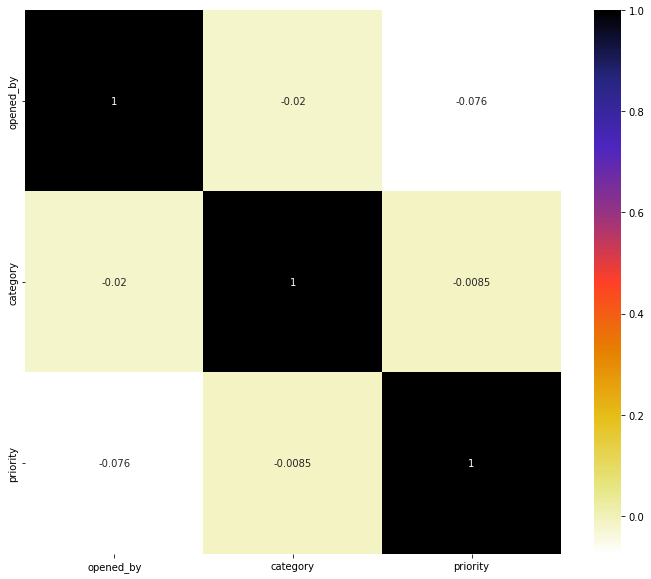

In [131]:
#feature selection using correlation
#web site :::: https://www.youtube.com/watch?v=FndwYNcVe0U&ab_channel=KrishNaik

plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

#see the size echanttionnage taken

## Splitting the dataset into the Training set and Test set

In [132]:
datasetV4.columns

Index(['opened_by', 'category', 'priority', 'Time (min)'], dtype='object')

In [147]:
from sklearn.model_selection import train_test_split
X = datasetV4.loc[:, datasetV4.columns != 'Time (min)']
y = datasetV4.loc[:,datasetV4.columns == 'Time (min)']

print(X)
#field test_size=0.7,random_state = 0 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3,random_state = 0)

      opened_by  category  priority
0            99        26         3
1            30        49         3
2            12        37         3
3            12        30         3
4            30        49         3
...         ...       ...       ...
8208         13        30         1
8209         78        40         3
8210         68         3         3
8211         95        30         3
8212         24        18         3

[8213 rows x 3 columns]


In [145]:
print(y)

      Time (min)
0         8960.0
1        10462.0
2        12110.0
3        10582.0
4        10317.0
...          ...
8208      7604.0
8209     27121.0
8210     12486.0
8211     16097.0
8212     11163.0

[8213 rows x 1 columns]


In [148]:
#display the time of prediction 
print("X_train dataset: ", X_train.shape) 
print("y_train dataset: ", y_train.shape) 
print("X_test dataset: ", X_test.shape) 
print("y_test dataset: ", y_test.shape)

X_train dataset:  (5475, 3)
y_train dataset:  (5475, 1)
X_test dataset:  (2738, 3)
y_test dataset:  (2738, 1)


In [135]:
#get better balance between classes
# web site ::: https://www.youtube.com/watch?v=YMPMZmlH5Bo&ab_channel=KrishNaik
#we should have many classes for time resolution so for the first time we go without balancing to see the defference in term of predection  


## Training the simple Linear Regression model on the Training set

In [149]:
#web site ::: https://www.youtube.com/watch?v=wTF6vzS9fy4&ab_channel=KrishNaik

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))
#display 



0.004417671450023031
0.0028975336230465665


In [138]:
print(len(y_pred))

5750


In [160]:
print(y_pred)


[[23344.91]
 [14744.82]
 [27358.71]
 ...
 [23990.55]
 [24881.81]
 [19280.43]]


In [161]:
print(y_test.shape)

#calculate the metric 

#

(2738, 1)


In [155]:
y_pred = reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(10,1), y_test.reshape(10,1)),1))


ValueError: cannot reshape array of size 2738 into shape (10,1)

In [ ]:
#Linear Cross-validation score
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

scores = cross_val_score(reg, X_train,y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.4f}".format(scores.mean()))

Cross-validation scores: [0.01217002 0.0080103  0.00226564 0.00728771 0.01091873]
Average cross-validation score: 0.0081


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4927 entries, 1850 to 2732
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   number     4927 non-null   int32
 1   opened_by  4927 non-null   int32
 2   category   4927 non-null   int32
 3   priority   4927 non-null   int32
dtypes: int32(4)
memory usage: 115.5 KB


In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4927 entries, 1850 to 2732
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (min)  4927 non-null   float64
dtypes: float64(1)
memory usage: 77.0 KB


In [ ]:
## Prepare the data for Visualization


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train
reg.fit(X_train_rm, y_train)
y_predict = reg.predict(X_train_rm)


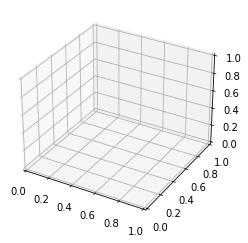

In [ ]:
# Visualize the Data for Linear Regression
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


In [ ]:
#Encoding categorical data converting all objects into numeric forms
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
#X = np.array(ct.fit_transform(datasetV4))

In [ ]:
#encoding 
#datasetV5["priority"].unique()

In [ ]:
#datasetV5["category"].unique()

In [ ]:
#we need to calculate the time of resolution of each incident 
#lets get the first version of data 


In [ ]:
temp = datasetV4[['priority','Time (min)']]
scatter_matrix(temp,figsize = (15,15), alpha = 0.8, marker = 'O')

array([[<AxesSubplot:xlabel='priority', ylabel='priority'>,
        <AxesSubplot:xlabel='Time (min)', ylabel='priority'>],
       [<AxesSubplot:xlabel='priority', ylabel='Time (min)'>,
        <AxesSubplot:xlabel='Time (min)', ylabel='Time (min)'>]],
      dtype=object)

Error in callback <function flush_figures at 0x00000231BBABE9D8> (for post_execute):


KeyboardInterrupt: 